#### _... to the only wise God!_

# Introduction

In the early days of my interest in machine learning (ML), the definition of the concept always got me curious! Each time I got told or read that machines (computers) are made to analyze and recognize patterns/relationships in data _without relying on standard rule-based programming practices_, I silently wondered about the last phrase of that definition. My naive understanding is that a computer has no mind of its own, and must get explicitly programmed on just any task demanded of it. While I am still no more than a rookie in ML (disappointedly), I at least now understand that indeed, machines do learn _without relying on standard rule-based programs_.

In this piece, I now attempt to demostrate to my fellow rookies that machines do learn! First, I present a small dataset (10-point, 2-dimension). I challenge you to mentally/visually determine if the data points naturally form clusters or sub-groups. I anticipate that by merely looking at the raw dataset (in its numerical form), you will discover three (3) natural clusters therein. Now, pause and take a look at the data below. 

Welcome back! Were you able to discover the three clusters of points in the data? That was **YOU LEARNING**!

Now, this piece is to demonstrate a **MACHINE LEARNING** (i.e. discovering) the same pattern in that same data. That is, I will get a machine (specifically, K-Means clustering algorithm) to classify the dataset into clusters, _without explicitly programming the clustering rules_; I'll let the algorithm figure it out. Humanly figuring out the clustering rules and explicitly programming such into computer is **NOT machine learning**! In my opinion, that's merely **'machine' implementing** the outcome of human learning.

For the sake of clarity, I will first do a 'machine' implementation of my own mental/visual clustering attempt. Thereafter, I will then showcase a truly machine learning solution to the challenge. Did you just asked _why relying on machine to learn patterns that I could as well learn myself?_ I will conclude this piece by highlighting the limitations of human learning, and showing that machine learning can surpass such limitations.

# Data Importation

In [6]:
### Import needed library
import pandas as pd    # Needed for handling data frame

### Import data from CSV file
scores = pd.read_csv("data_score.csv" , index_col = 'Student_ID')

### Display data
scores

,test_score,exam_score
Student_ID,,
1,8,20
2,29,67
3,28,62
4,20,45
5,18,40
6,19,43
7,6,19
8,17,40
9,22,48


# Human Learning: Mental/Visual Clustering Attempt

Looking at two columns of the data frame in its raw numerical form, one could see the following patterns:

1. Student $1$ and Student $3$ seems to have very high values both in test_score and exam_score.
1. Noticeably, Student $1$ and Student $7$ have low values in both test_score and exam_score
1. All other data points (students) seem to have moderate values for both test_score and exam_score columns.

On the basis of these observations, one could then formulate rules, in form of conditional statements and threshold values, that may be used to classify the data points into the three clusters. Essentially, the threshold values are the '_lessons_' to be learnt.

*  Cluster_1: $test\_score \geq 25$ and $exam\_score \geq 60$

       > Student 2 and Student 3 belong here

*  Cluster_2: $test\_score \geq 15$ and $exam\_score \geq 30$

       > Students 4, 5, 6, 8, 9 and 10 belong here

*  Cluster_3: $test\_score < 15$ and $exam\_score < 30$

       > Student 1 and Student 7 belong here

And that's it! '_Lessons_' learnt; threshold values chosen; and data points classified into three distinct clusters, all by a human agent staring at the data.

Admittedly, this human-learning attempt may be aided by computer via visualization. A simple x-y scatter plot of the data (as shown below) would aid the human eye in fixing the threshold values. However, the use of visualization tools to discover the cluster is still NOT machine learning; at best, it is Data Analytics (DA). So, why use machine learning, if DA can do it? Again, I will hereafter highlight the limitation of this visualization approach, and show that machine learning can surpass such limitation. In any case, to the extent that a human agent chooses the threshold values for the numerical or the visual form of the data, it is human learning. The agent (human or machine) that chooses the threshold values is the learning agent!

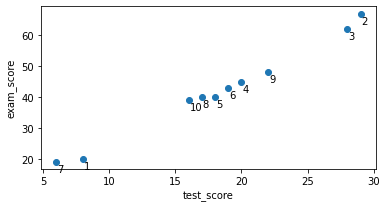

In [15]:
### Import library:
import matplotlib.pyplot as plt

### Create axes:
fig, ax = plt.subplots(figsize=(6, 3))

### Specify data and variables to plot
ax.plot(scores["test_score"], scores["exam_score"], linestyle="None", marker="o")

### Label axes:
ax.set_xlabel("test_score")
ax.set_ylabel("exam_score")

for ind in scores.index:
    ax.annotate(ind, xy=(scores.loc[ind]), xytext=(1, -10), textcoords="offset pixels")

### Display plot
plt.show()

# Machine Implementing Human Learning

Here, the clustering rules (i.e. the conditional statements) are explicitly programmed, as a machine implementation of the human-learnt threshold values. Specifically, Function _clust_ is created to implement the rules. This function requires both the data to be clustered and the threshold values as inputs arguments. The threshold values should be presented as a nested dictionary.

In [8]:
### Defining a function to implement the clustering
def clust(data, threshold_dict):
    cluster = []
    for test, exam in zip(data['test_score'],data['exam_score']):
        if (test >= threshold_dict['cluster_1']['test_score']) and (exam >= threshold_dict['cluster_1']['exam_score']):
            cluster.append('1')
        elif (test >= threshold_dict['cluster_2']['test_score']) and (exam >= threshold_dict['cluster_2']['exam_score']):
            cluster.append('2')
        else:
            cluster.append('3')
    data['Cluster'] = cluster
    return(data)

### Creating a copy of the dataset
scores_hl = scores.copy(deep=True)

### Presenting the human-learnt threshold values as a dictionary
threshold_dict = {'cluster_1': {'test_score': 25, 'exam_score': 60}, 'cluster_2': {'test_score': 15, 'exam_score': 30}}

### Calling the function on the scores_hl dataset with threshold values.
clust(scores_hl, threshold_dict)

,test_score,exam_score,Cluster
Student_ID,,,
1,8,20,3
2,29,67,1
3,28,62,1
4,20,45,2
5,18,40,2
6,19,43,2
7,6,19,3
8,17,40,2
9,22,48,2


Inasmuch as Function _clust_ requires the threshold values be given, it is not learning the threshold values. Rather, it is merely implementing it. Writing such lines of codes as in the definition of Function _clust_ is what is referred to as _rule-based programming practices_. And, that is what machine learning is said to NOT rely on.

# Now, Machine Learning: K-Means Clustering

Here, I simply showcase the performance of a machine learning algorithm (K-Means) in clustering the given dataset. The keynote point here is the fact that the K-Means algorithm performs the clustering task WITHOUT requring the threshold values or any conditional statements as clustering rules. The algorithm figures out the clustering rules by itself. However, the algorithm requires to know the desired number of clusters (three, in thus case).

In [10]:
### Create a copy of the dataset
scores_ml = scores.copy(deep=True)
 
### Import the K-Means function
from sklearn.cluster import KMeans

### Call the function.
kmeans_clust = KMeans(n_clusters=3, random_state=2, n_init=20).fit(scores_ml)

### View the output of KMeans clustering: the cluster labels for each datapoint.
kmeans_clust.labels_

array([1, 2, 2, 0, 0, 0, 1, 0, 0, 0])

From the output shown above, it is clear that the K-Means algorithm 'learnt' the same clustering pattern as that humanly learnt earlier. However, the K-Means algorithm labelled the clusters differently as _Cluster 0_, _Cluster 1_ and _Cluster 2_; respectively corresponding to _Cluster 2_, _Cluster 3_ and _Cluster 1_ of the human learning attempt. In the code cell that follows, the K-Means cluster labels are respectively mapped to intergers $2$, $3$ and $1$, in order to allow the comparison with the output of the human learning attempt.

In [11]:
### Create a dictionary for the mapping
mapping_dict = {'0': 2, '1': 3, '2': 1}

### Effect the mapping with a list comprehension
cluster_list = [mapping_dict[str(x)] for x in kmeans_clust.labels_]

### Append the 'Cluster' column to the dataframe
scores_ml['Cluster'] = cluster_list

### View the output.
scores_ml

,test_score,exam_score,Cluster
Student_ID,,,
1,8,20,3
2,29,67,1
3,28,62,1
4,20,45,2
5,18,40,2
6,19,43,2
7,6,19,3
8,17,40,2
9,22,48,2


The machine learning attempt gives same output as that obtained in the human learning attempt.

So, just how did the K-Means algorithm figure out the clustering pattern in the dataset?! How did it learn? Simple, it mimics humans! If you made a human attempt at discovering the clustering pattern in the data, you probably juggled the numbers in your head and iteratively aligned them into clusters on the basis of closeness and distinctiveness. Closeness: ensuring that datapoints in the same cluster are as close to themselves as much as possible. Distinctiveness: ensuring that each cluster is unmistakably different from other clusters. You probably had initially aligned a datapoint to a wrong cluster, only for you to later (in another iteration of juggling) re-aligned it to another cluster; because you felt it was closer to the datapoints in this other cluster. It is likely that after you had suceeded in aligning all datapoints, you went on to fix the threshold values as some intermediate numbers between the clusters. Quite interestingly, this iterative process of juggling/alignment/re-alignment is exacltly what goes on under the hood with the K-Means algorithm. 

The algorithm commences with a random (arbitrary) guess of the $K$ cluster centers in the feature space ($K$ being the desired number of clusters). Each cluster center is supposedly the middle (mean) of all datapoints in that cluster - hence, the name K-Means. With the initial guess of the cluster centers made, the algorithm aligns each datapoint to the closest cluster center; that is the first iteration. Thereafter, the algorithm computes (no more guess) new values of the cluster centers based on the datapoints attached to each center. Clearly, the computed centers (means) would be different from the initial guessed centers; that is, the centers would shift. With the shift in centers, the algorithms re-aligns the datapoints their closest centers. In this re-alignment, some datapoints would align with another center other than those they previuosly aligned with. And of course, with the re-alignment, the centers get re-computed and shifted again. This iterative process of computating/re-aligning/shifting continues until a criterion is met. This way, the K-Means algorithm is able to learn the location of the clsuter centers and perform the clustering by itself; neither requiring that humans should specify any threshold values nor needing explicit programming of rules.

Okay, machines learn; but, why deploying machines when humans can figure things out?! Just imagine how dizzying and overwhelming the head juggling will be if the dataset contains thousands of datapoints. You were able to mentally hold the datapoints while juggling them because there are just 10 of them; it would be impossible if there are thousands. Further still, things could become more compicated if there are more features to be considered (other than just _test_score_ and _exam_score_). Imagine a dataset with a dozen columns of features! So, it is clear that human learning is only limited to a small dataset - with a few rows and two/three columns. In practice, a dataset would be larger than such small size that humans can handle - that is where machine learning thrives. Also, attempting to aid human learning via computer visualization would not be possible for a dataset containing more than 3 columns of features. For example, a scatter plot with 12 axes would not be possible. Again, a machine learning algorithm would not be so limited.

# Conclusion

**Indeed, machines do learn!** The machine that learnt in this demonstration is the K-Means algorithm, and the lesson learnt is the set of values of cluster centers. While this article choses the K-Means algorithm for demonstration, the arguments presented here are true for other machine learning algorithims.